<h1><center>Laboratorio 6: El Pandas no Muerde (act IV) üêº</center></h1>

<center><strong>MDS7202: Laboratorio de Programaci√≥n Cient√≠fica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Pablo Badilla, Ignacio Meza
- Auxiliar: Sebasti√°n Tinoco
- Ayudante: Felipe Arias, Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no ser√°n revisados

- Nombre de alumno : Vicente B√≥rquez



### **Link de repositorio de GitHub:** https://github.com/VBorquezZ/MDS7202-1-23


## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisar√°n entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente ser√°n respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas pr√°cticas de programaci√≥n vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de im√°genes sin el uso de librer√≠as.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deber√° ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al m√°ximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante m√°s eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripci√≥n del laboratorio.

### Importamos librerias utiles üò∏

In [1]:
# Libreria Core del lab.
import numpy as np
!pip install --upgrade pandas
!pip install xlrd
!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Si usted est√° utilizando Colabolatory le puede ser √∫til este c√≥digo para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'drive/MyDrive/CC7202'
except: 
    print('Ignorando conexi√≥n drive-colab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Segmentaci√≥n de Clientes en Tienda de Retail üõçÔ∏è

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas.

Para esto, el √°rea de ventas les entrega el archivo `online_retail_II.pickle` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualizaci√≥n de los datos y se√±ale los atributos que componen el dataset. Se√±ale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [3]:
import os
path_retail_file = os.path.join(path,"online_retail_II.pickle" )
df_retail = pd.read_pickle(path_retail_file)
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price Customer ID         Country  
0 2009-12-01 07:45:00   6.95     13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75     13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75     13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10     13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25     13085.0  United Kingdom

## 1.2 Analis√≠s Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualizaci√≥n del dataset, *Don Mora* le solicita que realicen un an√°lisis exploratorio de los datos, para esto les deber√°n realizar un an√°lisis univariado y multivariado. De la revisi√≥n, ustedes deben explicar potenciales anomal√≠as visualizadas y se√±alar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con an√°lisis univariable, multivariable y de datos faltantes. ¬øQu√© beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 l√≠neas para su respuesta.

**Respuesta a la Pregunta:**

> Como su nombre lo indica, el an√°lisis univariado se centra en el estudio de una √∫nica variable de los datos a la vez, examinando medidas estad√≠sticas (media, varianza, moda, etc.). Por otro lado, el an√°lisis multivariable estudia en simult√°neo m√∫ltiples variables, aqu√≠ se estudian, correlaciones, dependencias, etc. entre las variables de los datos. Finalmente, el an√°lisis de datos faltantes, consiste en el estudio y manejo de aquellos valores faltantes (que sorpresa) o incompletos en los datos. Los principales beneficios que se tienen ser√≠an su mejor comprensi√≥n y entendimiento, as√≠ como manejo de errores.

### 1.2.1 An√°lisis Univariado [2 Puntos]

A continuaci√≥n, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la funci√≥n ``profile_serie()`` la cual recibe una serie y le entrega un an√°lisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un an√°lisis univariado de estas. A continuaci√≥n, comente acerca de el comportamiento de cada variable seg√∫n las estad√≠sticas descriptivas y los gr√°ficos generados.

In [4]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe()])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns = {'count': 'Count'})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [5]:
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

Intuitivamente, se deduce que la columna "Price" representa el precio de venta del elemento correspondiente (fila en el dataset). A priori, estos valores se encuentran en el intervalo entre -53594.36 y 25111.09.  No obstante, la mayor√≠a de los valores son inferiores a 20, es m√°s, con el an√°lisis de cuartiles, se ve que el primer cuartil est√° en 1.25, el tercero en 4.21 y los valores considerados dentro de rango (por el mismo an√°lisis de boxplots) son iguales o inferiores a 8.5.

Justamente por lo anterior es que el an√°lisis detecta varios outliers en valores de venta tan altos o tan negativos (m√°s comentarios sobre esto m√°s adelante) y al eliminarlos, la escala del gr√°fico sin outliers se reduce en un orden de magnitud completo.

Dado el idioma de los nombres de las columnas, la variaple "Description" y los valores de venta, se asume (razonablemente) que la moneda que se maneja es el USD.

M√°s all√° de que sea posible (aunque en extremo improbable) tener una venta por miles y miles de d√≥lares en una tienda donde los valores de venta son principalmente inferiores a 10 USD, se consideran como errores evidentes tener ventas con valores negativos o con valor 0 (hay 3 y 3687 ventas con montos inferiores e iguales a 0 respectivamente). No hay valores "Nulos" (o NaN) de venta.


In [6]:
profile_serie(df_retail['Invoice']) 

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

La variable 'Invoice' son n√∫meros aunque el tipo de datos es categ√≥rico. No tiene datos faltantes. M√°s del 98% de las filas tienen datos duplicados en esta variable. El valor que m√°s se repite lo hace 675 veces de un total posible de m√°s de 520000 datos. Es razonable suponer, con toda esta informaci√≥n, as√≠ como con el significado de "Invoice", que esta columna representa el c√≥digo de una factura de venta, esto porque cada factura tendr√° su c√≥digo identificador y podr√° tener m√∫ltiples productos vendidos.

In [7]:
profile_serie(df_retail['StockCode'])

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

La variable 'StockCode' son strings categ√≥ricos. No tiene datos faltantes. M√°s del 99% de las filas tienen datos duplicados en esta variable. El valor que m√°s se repite lo hace 3516 veces de un total posible de m√°s de 520000 datos. Es razonable suponer, con toda esta informaci√≥n, as√≠ como con el significado de "StockCode", que esta columna representa el c√≥digo identificador de cada producto vendido. La siguiente celda de c√≥digo imprime una lista con todos los elementos que tienen igual 'StockCode' pero distinta 'Description'.

In [8]:
pares_distintos = list(set(list(zip(df_retail['StockCode'], df_retail['Description']))))
resultado = [tupla for tupla in pares_distintos if tupla[0] == tupla[1]]

# Imprimir los elementos encontrados
for elemento in resultado:
    print(elemento)
resultado

[]

Como no existe un solo par de elementos que tengan un mismo 'StockCode', pero distinta descripci√≥n, es a√∫n m√°s s√≥lida la suposici√≥n de que esta variable representa, efectivamente, el c√≥digo identificador de cada producto.

In [9]:
profile_serie(df_retail['Description'])

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

La variable 'Description' son strings. No tiene datos faltantes. M√°s del 99% de las filas tienen datos duplicados en esta variable. El valor que m√°s se repite es "WHITE HANGING HEART T-LIGHT HOLDER" lo hace 3549 veces de un total posible de m√°s de 520000 datos. Dado el tipo de datos, lo que se puede leer en estos valores y las frecuencias, es razonable suponer que esta variable es simplemente una descripci√≥n del producto vendido. 
Es relevante notar que, a pesar de no tener datos faltantes, el segundo valor que m√°s se repite (2928 veces) es de hecho 'nan'. La interpretaci√≥n de esto es que de hecho no se necesita que un producto tenga una descripci√≥n, lo √∫nico que realmente es necesario para identificar un producto es el 'StockCode'.

In [10]:
profile_serie(df_retail['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

La variable 'Quantity' est√° compuesta por valores num√©ricos. No hay datos faltantes (como nulos). Aunque la mayor√≠a de los valores son positivos e inferiores a 100, hay 12326 valores negativos y el rango de esta variable est√° entre -9600 y 19152. Notar que no hay valores de 'Quantity' iguales a 0.

Se asume, dado el nombre de la columna, que esta variable representa la cantidad de elementos (del mismo producto) vendidos en la operaci√≥n representada por cada dato (fila) registrado.

Justamente por esto √∫ltimo es que, aunque si es posible tener una √∫nica venta de 19152 productos iguales (aunque muy improbable dadas las cantidades de ventra registradas regularmente), s√≠ se sabe que es absolutamente imposible tener una venta de alguna cantidad negativa de productos.

No obstante no es posible vender una cantidad negativa de productos, si es posible que una factura registre una cantidad negativa sin que esto sea necesariamente un error. Cuando un producto es registrado en la factura (al pasar por "caja") y antes de pagar, el cliente se puede arrepentir de comprar dicho producto, en este caso, la venta se "cancela" al registrar una "venta negativa de dicha cantidad del producto" antes del pago. Esto √∫ltimo ser√° importante en la limpieza de datos. 

In [11]:
profile_serie(df_retail['InvoiceDate'])

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

La variable 'InvoiceDate' representa la fecha y hora de emisi√≥n de la factura. Estas fechas (son del tipo datetime64) van desde el 22 de noviembre del 2009 al 18 de diciembre del 2010. No hay datos faltantes. 

Como el periodo de tiempo es de un a√±o aproximadamente, no se pueden comparar meses iguales de distintos a√±os (con excepci√≥n de noviembre y diciembre de 2009 y 2010). S√≠ se puede decir que las ventas se concentran entre octubre y noviembre del 2010. Tambi√©n se puede decir que, aunque hay variaciones notorias en la cantidad de ventas, la mayor diferencia de cantidades de venta por periodo medido se da entre el tercer (10 ventas) y el antepen√∫ltimo (69 ventas) periodo. Dicha diferencia es de  7 veces, es decir, no alcanza a ser de un orden de magnitud. El criterio para determinar si esta diferencia es importante o no para el negocio, le corresponde a Mr. Lepin Mora.


In [12]:
profile_serie(df_retail['Customer ID'])

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

La variable 'Customer ID' son n√∫meros aunque el tipo de datos es categ√≥rico.  Dado el nombre de esta variable, es muy razonable suponer que esta es un c√≥digo identificador para el cliente que realiza la compra.  Aunque m√°s del 20% son datos faltantes, esto no se considera un error, dado que el cliente puede tener una ID si es parte de alg√∫n programa de "socios" o "cliente frecuente", es posible suponer que se pueda realizar una compra sin que el cliente entrege informaci√≥n alguna sobre su identificaci√≥n particular (Ej.: Al comprar en un supermercado con efectivo sin dar el rut.).

In [13]:
profile_serie(df_retail['Country'])

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

La variable 'Country' son strings. No tiene datos faltantes. El valor que m√°s se repite es "United Kingdom" lo hace 485852 veces de un total posible de m√°s de 520000 datos. Dado el tipo de datos, los valores que toma y el nombre de esta variable, se asume que esta representa el nombre del pa√≠s en el cu√°l se registra la venta.

En el an√°lisis de "Price" se asumi√≥ que la moneda de venta eran USD. Considerando que m√°s del 93% de las ventas se realizaron en el Reino Unido y que el 1.8% en Irlanda (EIRE), se asume ahora que la moneda de venta es la libra esterlina ¬£.




### 1.2.2 An√°lisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrar√° la funci√≥n ``profile_df()`` que recibe un dataframe como entrada y realiza un an√°lisis bivariado de todas las variables num√©ricas que conforman el dataframe, un analisis de la correlaci√≥n de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [14]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df[list_type].corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

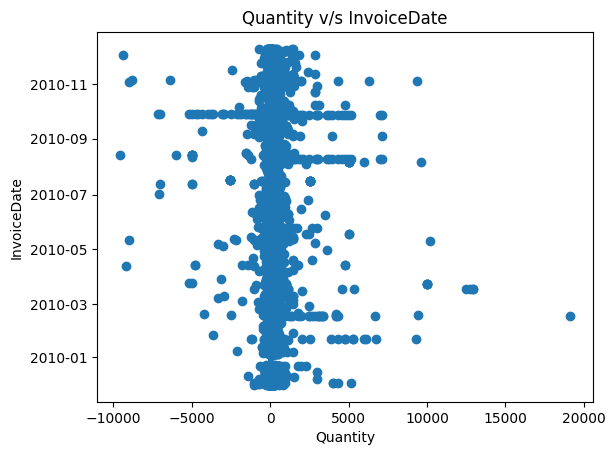

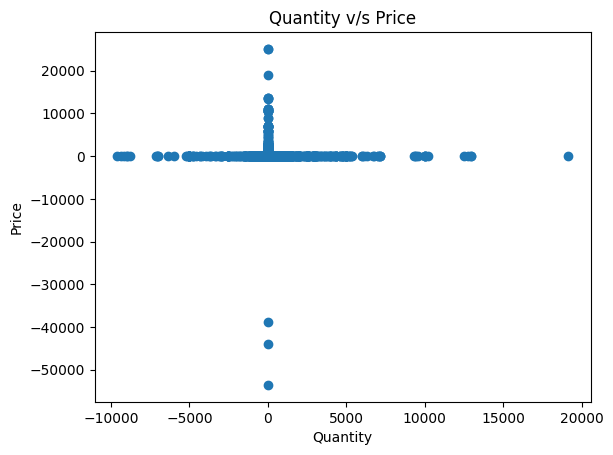

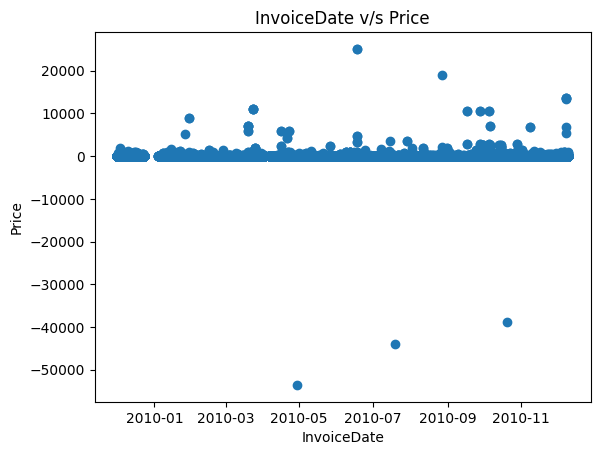

## Correlation:

## Missing Matrix:

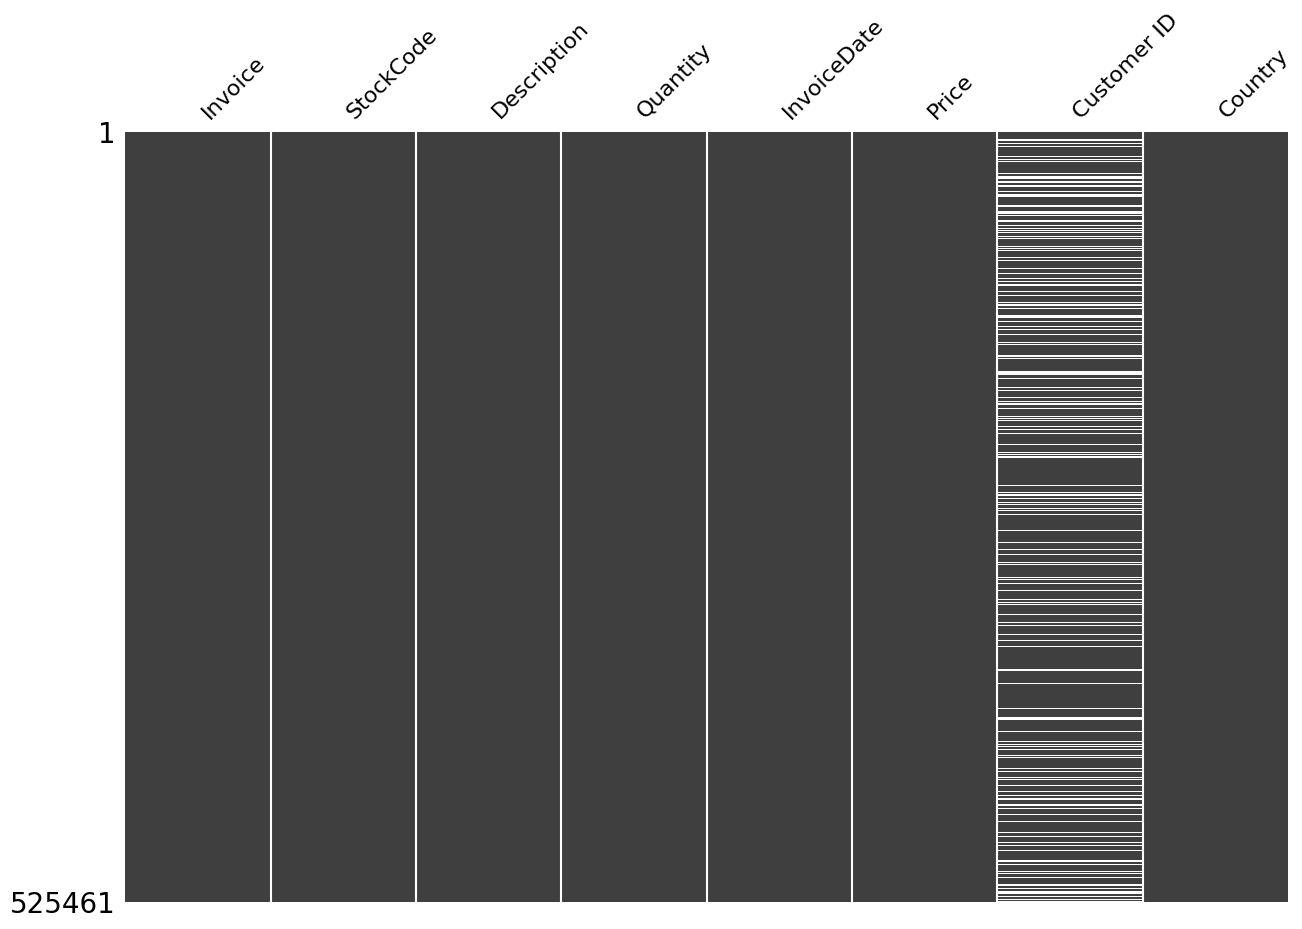

In [15]:
profile_df(df_retail)

1. **Del primero de los gr√°ficos generados "Quantity v/s InvoiceDate":** 

Siendo cada punto del gr√°fico una venta, es claro que la mayor parte de las ventas es de una cantidad cercana al cero, esta "cercan√≠a" es en comparaci√≥n a cantidades de miles y decenas de miles (esa es la escala del eje X del gr√°fico). Como ya se hab√≠a podido notar en el an√°lisis previo, hay cantidades de venta negativas. 

Lo m√°s destacable del gr√°fico es que hay ciertas fechas que registran muchas ventas distintas de cantidades muy altas o muy negativas, esto se refleja en que existan cuatro fechas distintas en que estas cantidades tan altas forman 'l√≠neas' en el mismo gr√°fico. Estas 4 fechas est√°n entre (1 y 2): 2010-01 y 2010-03, 3) 2010-07 y 2010-09 y 4) 2010-09 y 2010-11. 

Esto √∫ltimo hace pensar que, a pesar de ser muy poco comunes, las compras por cantidades muy altas de productos pueden ser posibles (ya que m√∫ltiples de estas ocurriendo el mismo d√≠a dif√≠cilmente sea coincidencia) y no necesariamente errores de paso de datos.

2. **Del segundo de los gr√°ficos generados "Quantity v/s Price":** 

Siendo cada punto del gr√°fico una venta, es claro que la mayor parte de las ventas es de un precio cercano al cero, esta "cercan√≠a" es en comparaci√≥n a los precios de decenas de miles ¬£ (esa es la escala del eje Y del gr√°fico). Hay 3 ventas con precios negativos, ya se asume que estas son errores.

Es muy importante notar que todas las ventas que tienen precios de decenas de miles de ¬£ son de cantidades muy cercanas al 0 (una vez m√°s, en comparaci√≥n a las decenas de miles). Esto se refleja en que las √∫nicas ventas que se alejan de manera significativa de la recta "Price = 0" se encuentran justamente en una aproximaci√≥n de la recta "Quantity = 0".

El hecho de que los productos m√°s caros sean aquellos que se venden de a pocas unidades es algo razonable. Esto se puede ver intuitivamente con una observaci√≥n: la mayor√≠a de las familias (al menos en nuestro pa√≠s) cuando compran un producto muy caro como un veh√≠culo o electrodom√©stico (objetos naturalmente de precio elevado) solamente compran uno del mismo, mientras que en productos m√°s baratos (clavos, botones, l√°pices, manzanas, etc.) compran muchos del mismo. Justo por lo anterior, es que habr√≠a sido extra√±o ver ventas de muchas cantidades de productos de precio muy elevado (que no es el caso). 

3. **Del tercero de los gr√°ficos generados "InvoiceDate v/s Price":** 

Ignorando los casos asumidos como errores (precios negativos), no hay informaci√≥n nueva muy √∫til que permita relacionar la fecha de venta con el precio. Como ya se hab√≠a visto antes, la mayor√≠a de las ventas son por montos significaativamente inferiores a  ¬£5000. Por otro lado, las pocas ventas de m√°s de ese monto, aunque algunas se agrupan en ciertas fechas, no son suficientes como para deducir una correlaci√≥n o dependencia clara entre fecha y precio de venta.


4. **De la matriz de correlaci√≥n "Quantity, InvoiceDate y Price":** 

La √∫nica informaci√≥n que entrega esta matriz es que de hecho no existe ninguna correlaci√≥n (de Pearson) significativa entre ning√∫n par de estas variables.

5. **De la matriz de datos faltantes:** 

Esta matriz entrega la informaci√≥n que ya se mencion√≥ en el an√°lisis univariable. La √∫nica variable con datos faltantes (nulos o NaN) es la de CustomerID, adem√°s la distribuci√≥n entre la primera venta (fila del dataset) y la √∫ltima tiende a ser homog√©nea. Recordar que hay 2928 ventas que en "Description" tienen el string "nan", estos casos no se reflejan en esta matriz dado que no se trata de datos nulos, sino que de un string como los dem√°s en dicha variable.

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una funci√≥n que permita limpiar el dataset. Realice esta funci√≥n en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la funci√≥n, realice nuevamente el an√°lisis exploratorio y comente las principales diferencias.

**Respuesta:**

Antes de dar el c√≥digo, se establecen los siguientes criterios u observaciones que dictaminar√°n qu√© se considera como error o dato faltante y qu√© no:

1. Precio de venta menor o igual a 0. Todo producto que se vende debe tener un valor de venta positivo (en caso contrario no es venta). La forma de tratar estos datos ser√° elimin√°ndolos (0.7% del total).

2. Dado el enunciado, se considera como imposibles (y por ende errores) una cantidad negativa en ventas en todos los casos. Por lo que estos registros ser√°n eliminados.

3. Para tratar los datos nulos de CustomerID, como no se considera que esto sea un error, se le asignar√° a todos estos casos, el id de cliente 0.0. De este modo, la ID de cliente 0.0 representar√° a todos aquellos clientes (distintos entre s√≠) que o no est√°n registrados como clientes en la base de datos de la empresa de Mr. Lepin Mora o que al momento de la compra no desean identificarse.


In [16]:
# Eliminando ventas con precio negativo o 0 ::
df_retail_clean = df_retail[df_retail['Price']>0]

# Eliminando ventas con cantidad negativa
df_retail_clean = df_retail_clean[df_retail_clean['Quantity'] >= 0]

In [17]:
# Reemplazando los NaN en 'Customer ID' por la ID 0.0
# Antes, se verifica que no exista otro usuario con dicho ID

id_unknown_customer = np.float64(0.0)
if id_unknown_customer in df_retail_clean['Customer ID'].values:
  print("Escoge un nuevo valor para la ID de clientes no identificados.")
else:
  df_retail_clean['Customer ID'] = df_retail_clean['Customer ID'].cat.add_categories([id_unknown_customer])
  df_retail_clean['Customer ID'] = df_retail_clean['Customer ID'].fillna(id_unknown_customer)

In [18]:
for col in df_retail_clean.columns:
  profile_serie(df_retail_clean[col]) 

## Invoice Profile

Type                           category
Number of observations           511566
Unique                            20952
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   509446
Duplicate rows (%)              99.59 %
Total size in memory      6402996 bytes
dtype: object

## StockCode Profile

Type                           category
Number of observations           511566
Unique                             4251
Top                              85123A
Freq                               3421
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   511395
Duplicate rows (%)              99.97 %
Total size in memory      5284852 bytes
dtype: object

## Description Profile

Type                                                  object
Number of observations                                511566
Unique                                                  4534
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3455
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        511389
Duplicate rows (%)                                   99.97 %
Total size in memory                           8185056 bytes
dtype: object

## Quantity Profile

Type                              int64
Number of observations         511566.0
Mean                           11.40015
Std                           86.761177
Min                                 1.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                       11849.646687
Skew                           88.67179
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   511425
Duplicate rows (%)              99.97 %
Total size in memory      8185056 bytes
dtype: object

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           511566
Mean                      2010-06-28 22:20:30.395491584
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 15:22:00
50%                                 2010-07-07 09:41:00
75%                                 2010-10-15 15:06:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   509777
Duplicate rows (%)                              99.65 %
Total size in memory                      8185056 bytes
dtype: object

## Price Profile

Type                            float64
Number of observations         511566.0
Mean                           4.252563
Std                           63.664629
Min                               0.001
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                       61551.915238
Skew                           210.3689
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   510710
Duplicate rows (%)              99.83 %
Total size in memory      8185056 bytes
dtype: object

## Customer ID Profile

Type                           category
Number of observations         511566.0
Unique                           4313.0
Top                                 0.0
Freq                           103902.0
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   511475
Duplicate rows (%)              99.98 %
Total size in memory      5282868 bytes
dtype: object

## Country Profile

Type                              object
Number of observations            511566
Unique                                40
Top                       United Kingdom
Freq                              473379
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    511566
Duplicate rows (%)               100.0 %
Total size in memory       8185056 bytes
dtype: object

## Bivariant Analysis:

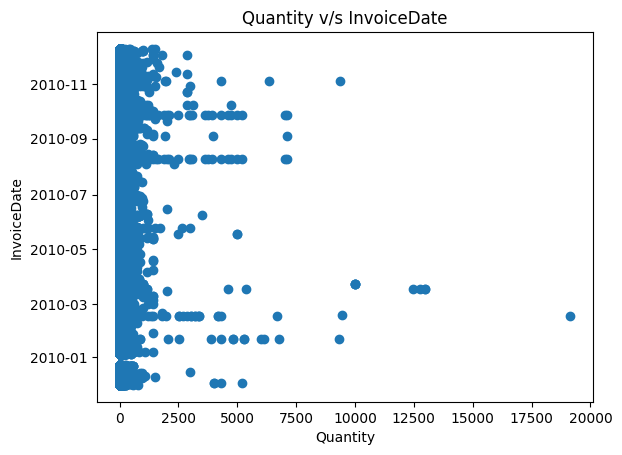

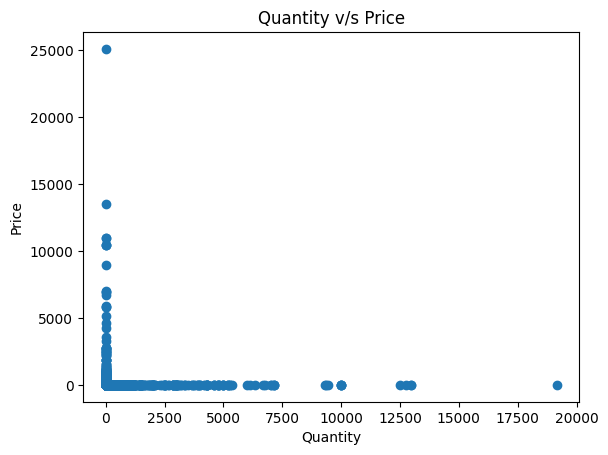

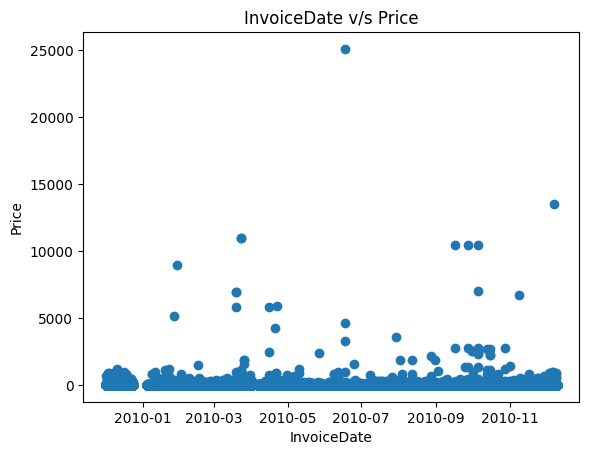

## Correlation:

## Missing Matrix:

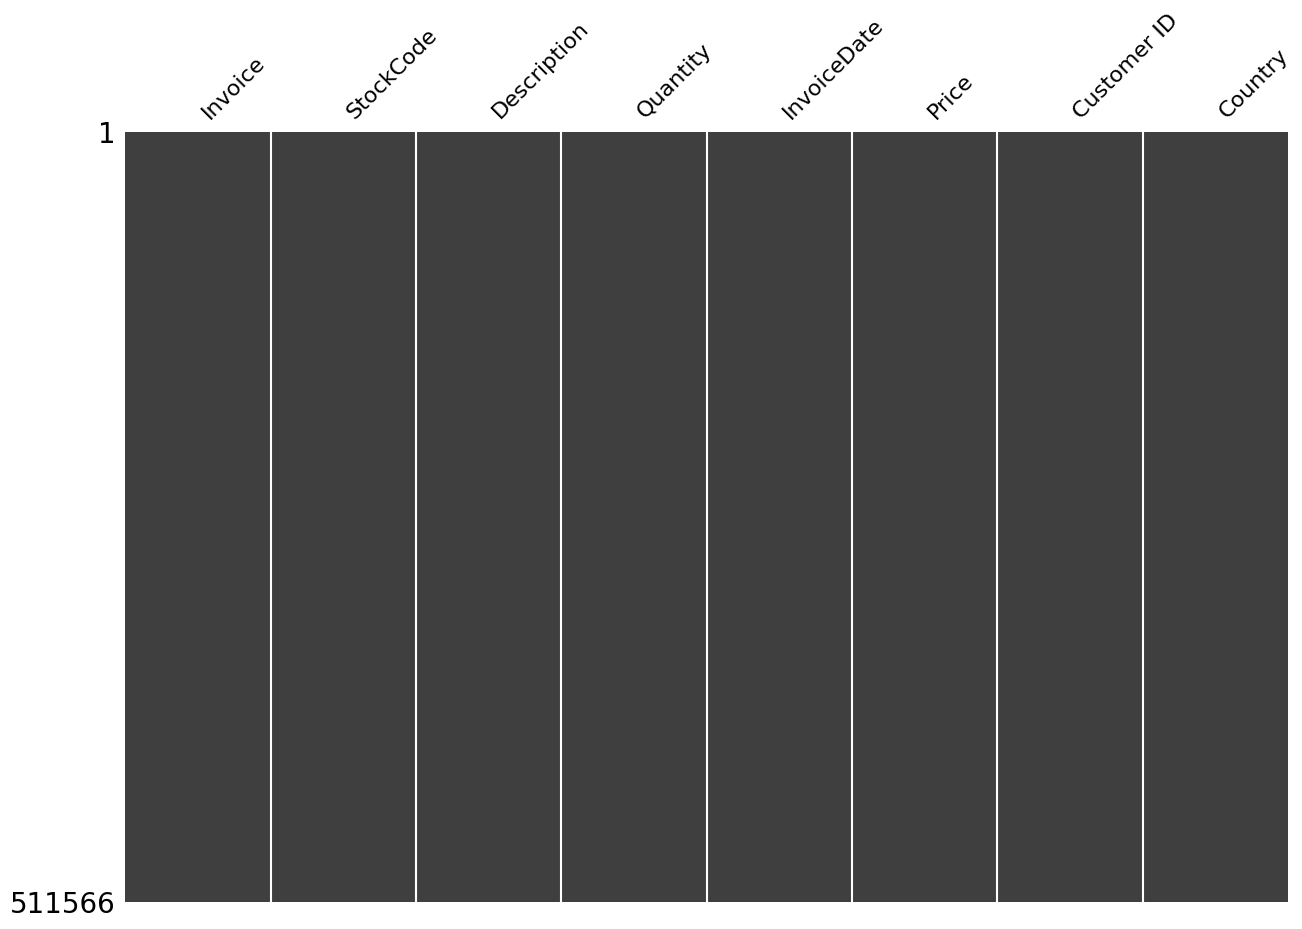

In [19]:
profile_df(df_retail_clean) 

Dados los an√°lisis (con las funciones dadas) sobre los datos (en las √∫ltimas celdas de c√≥digo), las principales diferencias entre los datos limpios y sin limpiar, son los siguientes:

1. Se tienen 13895 registros menos porque fueron eliminados.
2. Ya no hay cantidades ni precios de venta negativos, pues estos casos fueron eliminados.
3. La matriz de datos faltantes ya no muestra datos faltantes, esto porque los casos de "Customer ID" con valores nulos, se reemplazaron con una ID nueva para clientes sin identificar. 

### 1.2.4 Obtenci√≥n de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la secci√≥n 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan m√°s ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la informaci√≥n en un gr√°fico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¬øLos art√≠culos m√°s vendidos son los mismos que generan m√°s ganancias?, Comente los resultados obtenidos.

**Resultados:**

Como por enunciado no se consideran los comentarios de la secci√≥n 1.2, se trabajar√° con los datos originales (sin limpiar). Se asume que la ganancia de una venta  de un producto se calcula como el producto entre la cantidad vendida por el precio.

In [20]:
df_retail['Ganancia'] = df_retail['Price'] * df_retail['Quantity']

# Agrupar por Id_Producto y sumar las ganancias
ganancias_por_producto = df_retail.groupby('StockCode')['Ganancia'].sum().reset_index()

#El top X de productos que dan m√°s ganancias
top_X = 30

# Obtener el Top 30 de productos con mayor ganancia
top_X_productos = ganancias_por_producto.nlargest(top_X, 'Ganancia')


# Los C√≥digos de productos:
codestopX = list(top_X_productos['StockCode'])

# Las ganancias
gananciasTopX = list(top_X_productos['Ganancia'])

# Las cantidades:
quantities_topX = df_retail[df_retail['StockCode'].isin(codestopX)].groupby('StockCode')['Quantity'].sum().loc[codestopX].tolist()

codestopX = [str(x) for x in codestopX]


Ahora se grafica:

In [21]:
import plotly.graph_objects as go


fig = go.Figure(data=go.Bar(x=codestopX, y=gananciasTopX))


fig.update_layout(title='Top 30 Ganancias por Producto',
                  xaxis_title='C√≥digo de producto',
                  yaxis_title='Ganancia')

fig.show()

In [22]:
fig = go.Figure(data=go.Bar(x=codestopX, y=quantities_topX))


fig.update_layout(title='Top 30 productos Cantidades vendidas',
                  xaxis_title='C√≥digo de producto',
                  yaxis_title='Cantidad vendida')

fig.show()

Claramente, no existe ninguna relaci√≥n directa entre la cantidad vendida de un producto y la ganancia que este genera. Por ejemplo: el producto que menos se vendi√≥ (1231 ventas) del top 30 de los que dieron m√°s ganancia, con c√≥digo "DOT" ocupa el tercer lugar en ganancias (m√°s de 116k), mientras que el m√°s vendido de dicho top es el de c√≥digo '21212' con 59k ventas, pero dando 31k de ganancias.

### 1.2.5 Visualizaci√≥n del registro temporal [0,75 ptos]

El due√±o del retail en su af√°n por saber m√°s sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el d√≠a tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `a√±o-mes-d√≠a`. ¬øEs posible observar datos extra√±os?, Comente lo que observa del gr√°fico.

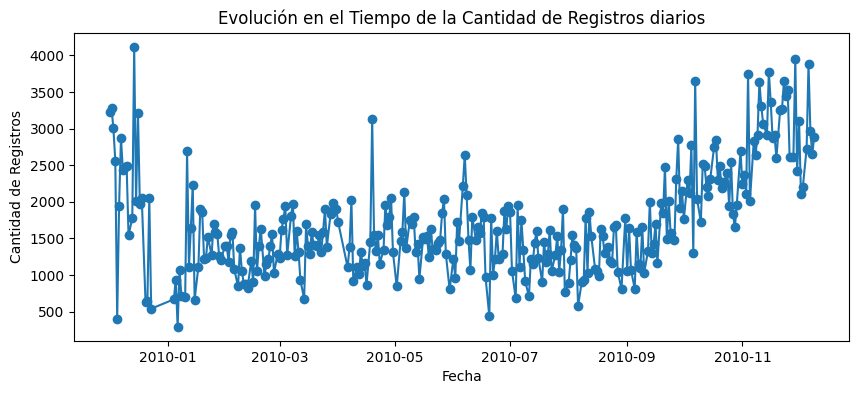

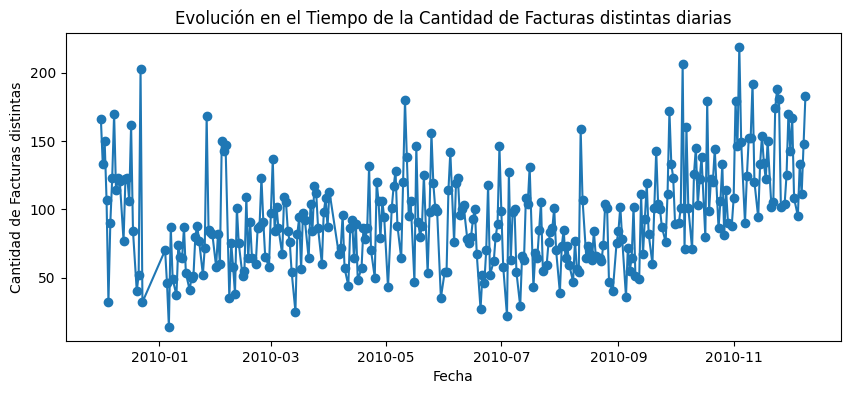

In [23]:
def plot_ventas(dataframe):

    df_retail['JustDate'] = pd.to_datetime(df_retail['InvoiceDate'].dt.date)

    instances_per_date = dataframe.groupby(dataframe['JustDate'].dt.date)['JustDate'].count()

    different_Invoices_per_date = dataframe.groupby(df_retail['JustDate'].dt.date)['Invoice'].nunique()
    
    plt.figure(figsize=(10, 4))
    plt.plot(instances_per_date.index, instances_per_date.values, marker='o')
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad de Registros')
    plt.title('Evoluci√≥n en el Tiempo de la Cantidad de Registros diarios')
    plt.show()

    
    plt.figure(figsize=(10, 4))
    plt.plot(different_Invoices_per_date.index, different_Invoices_per_date.values, marker='o')
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad de Facturas distintas')
    plt.title('Evoluci√≥n en el Tiempo de la Cantidad de Facturas distintas diarias')
    plt.show()


  

plot_ventas(df_retail)

Si bien es cierto los gr√°ficos no son id√©nticos, si se parecen bastante en el sentido que se puede notar una baja significativa en las ventasentre diciembre de 2009 y enero de 2010. Ninguno de los gr√°ficos es suave, es decir, se pueden tener grandes diferencias en las ventas entre un d√≠a y otro. No obstante lo anterior, se puede ver una tendencia **general** relativamente constante entre enero y septiembre de 2010; mientras que a partir de septiembre de dicho a√±o en adelante, se puede ver un aumento **general** consistente y constante.


# Conclusi√≥n
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>